# trade and el nino (ENSO), looking for network effects and correlations

## data on trade is imported and cleaned before

## data on el nino (ENSO) is imported and cleaned afterwards 

In [1]:
import pandas
import numpy as np

import requests
import zipfile as zf
from pathlib import Path

In [2]:
url="http://fenixservices.fao.org/faostat/static/bulkdownloads/Trade_DetailedTradeMatrix_E_All_Data_(Normalized).zip"
r = requests.get(url)
# 300 MB dowload, slow..

In [3]:
filename = Path('Trade_DetailedTradeMatrix_E_All_Data_(Normalized).zip')
filename.write_bytes(r.content) 

289147564

In [4]:
files = zf.ZipFile('Trade_DetailedTradeMatrix_E_All_Data_(Normalized).zip', 'r')
files.extractall('')
files.close()

In [5]:
#(you can just start here if you download the linked file to the same folder)

In [6]:
pd = pandas.read_csv('Trade_DetailedTradeMatrix_E_All_Data_(Normalized).csv', sep=',', encoding='latin1')

In [7]:
pd.head()

,Reporter Country Code,Reporter Countries,Partner Country Code,Partner Countries,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,4,Algeria,230,"Cashew nuts, shelled",5910,Export Quantity,2016,2016,tonnes,3.0,*
1,2,Afghanistan,4,Algeria,230,"Cashew nuts, shelled",5922,Export Value,2016,2016,1000 US$,23.0,*
2,2,Afghanistan,4,Algeria,1293,Crude materials,5922,Export Value,2015,2015,1000 US$,1.0,*
3,2,Afghanistan,4,Algeria,1293,Crude materials,5922,Export Value,2016,2016,1000 US$,1.0,*
4,2,Afghanistan,4,Algeria,1293,Crude materials,5922,Export Value,2017,2017,1000 US$,5.0,R


In [8]:
print(pd["Item"].unique())

['Cashew nuts, shelled' 'Crude materials' 'Raisins' 'Spices nes'
 'Food prep nes' 'Maize' 'Meat, chicken' 'Milk, whole dried'
 'Sugar refined' 'Cigarettes' 'Plums dried (prunes)' 'Almonds shelled'
 'Almonds, with shell' 'Apricots' 'Apricots, dry'
 'Beverages, non alcoholic' 'Chick peas' 'Cream fresh' 'Figs dried'
 'Fruit, dried nes' 'Fruit, prepared nes'
 'Meat, cattle, boneless (beef & veal)' 'Meat, sheep'
 'Milk, skimmed dried' 'Nuts nes' 'Nuts, prepared (exc. groundnuts)'
 'Oilseeds nes' 'Pastry' 'Rice, milled'
 'Rice, paddy (rice milled equivalent)' 'Sugar confectionery' 'Tallow'
 'Vegetables, frozen' 'Vegetables, preserved nes' 'Walnuts, shelled'
 'Whey, dry' 'Yoghurt, concentrated or not' 'Cheese, processed'
 'Cheese, whole cow milk' 'Chocolate products nes' 'Groundnuts, prepared'
 'Lactose' 'Lemons and limes' 'Pistachios' 'Sugar Raw Centrifugal' 'Tea'
 'Buttermilk, curdled, acidified milk' 'Cake, cottonseed'
 'Eggs, hen, in shell' 'Flour, wheat' 'Milk, whole condensed'
 'Milk, w

### A selection of durable products with significant amounts of global trade is made (alternatively it would be possible to keep al layers, but it seems too much):

### Durable products (cereals, pulses, dry tubers, vegetable oils and their sources, and non-baked derived products in durable forms) by amount traded: all items with annual trade above 1,000,000 T (2019), are included, in total 39 elements (note: 39 for 2019; in 2018 there were 37, perhaps the change in coding rice influenced it) .  
###### (Source: FAOSTAT Trade Matrix at  http://www.fao.org/faostat/en/#data/TM ) 


In [9]:
print(pd["Year Code"].unique())


[2016 2015 2017 2014 2011 2018 2019 2010 2009 2002 2012 1991 1996 2007
 2004 2008 1987 2006 1993 1994 2001 2005 2013 2003 1990 1997 2000 1999
 1992 1995 1998 1986 1988 1989]


### 2019 is available, promising data delivery schedule!

In [10]:
#keep 2019 export q
pd19q = pd[(pd["Year Code"] == 2019) & (pd["Element"] == "Import Quantity") ]
pd19q.head(10)

,Reporter Country Code,Reporter Countries,Partner Country Code,Partner Countries,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
261,2,Afghanistan,11,Austria,633,"Beverages, non alcoholic",5610,Import Quantity,2019,2019,tonnes,1172.0,*
274,2,Afghanistan,11,Austria,907,"Cheese, processed",5610,Import Quantity,2019,2019,tonnes,127.0,R
305,2,Afghanistan,11,Austria,1232,Food prep nes,5610,Import Quantity,2019,2019,tonnes,250.0,R
387,2,Afghanistan,52,Azerbaijan,666,Chocolate products nes,5610,Import Quantity,2019,2019,tonnes,40.0,*
391,2,Afghanistan,52,Azerbaijan,1062,"Eggs, hen, in shell",5610,Import Quantity,2019,2019,tonnes,198.0,*
427,2,Afghanistan,52,Azerbaijan,1225,Tallow,5610,Import Quantity,2019,2019,tonnes,64.0,*
436,2,Afghanistan,52,Azerbaijan,891,Yoghurt,5610,Import Quantity,2019,2019,tonnes,547.0,*
869,2,Afghanistan,255,Belgium,1232,Food prep nes,5610,Import Quantity,2019,2019,tonnes,5.0,*
884,2,Afghanistan,255,Belgium,115,"Food preparations, flour, malt extract",5610,Import Quantity,2019,2019,tonnes,100.0,*
892,2,Afghanistan,255,Belgium,653,Food wastes,5610,Import Quantity,2019,2019,tonnes,23.0,*


In [11]:
#group value by item
top_imports = pd19q.groupby('Item')['Value'].sum().reset_index()
top_imports_sorted = top_imports.sort_values(by='Value', ascending=False)
#print(top_imports.sort_values(by='Value', ascending=False).head(70))
top_imports_sorted_list = top_imports_sorted.values.tolist()

for x in range(len(top_imports_sorted_list)): 
    print(top_imports_sorted_list[x])


['Maize', 164928287.0]
['Wheat', 161862063.0]
['Soybeans', 147777416.0]
['Cake, soybeans', 64038508.0]
['Oil, palm', 47026133.0]
['Pigs', 39962557.0]
['Rice, paddy (rice milled equivalent)', 36871914.0]
['Sugar Raw Centrifugal', 32444883.0]
['Barley', 30779662.0]
['Rice, milled', 26186925.0]
['Bananas', 22439695.0]
['Waters,ice etc', 21680812.0]
['Rapeseed', 21663135.0]
['Beverages, non alcoholic', 21215102.0]
['Food prep nes', 20207592.0]
['Sugar refined', 18843062.0]
['Beer of barley', 16610093.0]
['Potatoes', 14587241.0]
['Beehives', 14478662.0]
['Food wastes', 13520528.0]
['Cattle', 13047865.0]
['Sheep', 12669546.0]
['Oil, sunflower', 12453005.0]
['Dregs from brewing, distillation', 12043276.0]
['Meat, chicken', 11878774.0]
['Oil, soybean', 10983370.0]
['Cake, rapeseed', 10799425.0]
['Wine', 10792383.0]
['Pastry', 10405442.0]
['Flour, wheat', 10383059.0]
['Cake, sunflower', 10268768.0]
['Milk, whole fresh cow', 10179125.0]
['Cake, palm kernel', 9511908.0]
['Fruit, prepared nes', 85

In [24]:
# this is the list made from the selection above, on the indicated "durables" criteria above, 
# just updated (2021-03-03) for 2019, and excluding many items that are actually animal feed (e.g. "Cake, soybeans")
durables =  [
"Maize",     
"Wheat", 
"Soybeans", 
"Oil, palm", 
"Rice, paddy (rice milled equivalent)", # 'Rice, paddy', excluded to avoid double counting(!)
"Barley", 
"Rice, milled",
"Rapeseed", 
"Oil, sunflower", 
"Oil, soybean",
"Flour, wheat", 
"Oil, rapeseed", 
"Chick peas",
"Sunflower seed",   
"Peas, dry",
"Rice, broken",
"Bran, wheat",
"Cassava dried",
"Macaroni",
"Starch, cassava",
"Lentils",
"Oats",
"Sorghum", 
"Beans, dry", 
"Food preparations, flour, malt extract",
"Cereals, breakfast",
"Groundnuts, shelled",
"Rice, husked",    
"Oil, coconut (copra)",
"Oil, olive, virgin",
"Sesame seed",
"Cereal preparations nes",
"Linseed",
"Flour, maize", 
"Mixes and doughs", 
"Coconuts",
"Rye",
"Rice, milled/husked", 
"Oats rolled"
  ]
print(len(durables))

39


In [25]:
pd_main = pd[(pd["Item"].isin(durables))]

In [26]:
print(pd_main["Item"].unique())

['Maize' 'Chick peas' 'Rice, milled'
 'Rice, paddy (rice milled equivalent)' 'Flour, wheat' 'Oil, sunflower'
 'Wheat' 'Beans, dry' 'Coconuts' 'Groundnuts, shelled'
 'Cereals, breakfast' 'Food preparations, flour, malt extract' 'Macaroni'
 'Mixes and doughs' 'Oil, olive, virgin' 'Peas, dry' 'Sunflower seed'
 'Lentils' 'Oil, rapeseed' 'Sesame seed' 'Soybeans'
 'Cereal preparations nes' 'Oats' 'Flour, maize' 'Oats rolled'
 'Bran, wheat' 'Oil, coconut (copra)' 'Sorghum' 'Oil, palm' 'Barley'
 'Rapeseed' 'Rice, husked' 'Linseed' 'Rice, broken' 'Rye' 'Cassava dried'
 'Oil, soybean' 'Rice, milled/husked' 'Starch, cassava']


In [27]:
print(len(pd_main["Item"].unique()))

39


In [28]:
#minor sanity test

diff111 = np.setdiff1d(durables,pd_main["Item"].unique())
print(diff111)


[]


In [16]:
pd_main.tail()

,Reporter Country Code,Reporter Countries,Partner Country Code,Partner Countries,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
39473917,181,Zimbabwe,181,Zimbabwe,56,Maize,5622,Import Value,1992,1992,1000 US$,242.0,NaN
39473928,181,Zimbabwe,181,Zimbabwe,83,Sorghum,5610,Import Quantity,1986,1986,tonnes,725.0,NaN
39473929,181,Zimbabwe,181,Zimbabwe,83,Sorghum,5622,Import Value,1986,1986,1000 US$,100.0,NaN
39473940,181,Zimbabwe,181,Zimbabwe,267,Sunflower seed,5610,Import Quantity,1991,1991,tonnes,17.0,NaN
39473941,181,Zimbabwe,181,Zimbabwe,267,Sunflower seed,5622,Import Value,1991,1991,1000 US$,25.0,NaN


## are the lists of names of countries correct? yes, see below

In [18]:
pd_main["Reporter Countries"].unique() == pd_main["Partner Countries"].unique() 

/Users/rogercremades/anaconda3/envs/drought_plots/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


False

In [19]:
pd_main["Reporter Countries"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belgium-Luxembourg', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chile',
       'China, Hong Kong SAR', 'China, Macao SAR', 'China, mainland',
       'China, Taiwan Province of', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', 'Czechoslovakia',
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Eswatini', 'Ethiopia', 'Ethiopia PDR', 'Faroe Islands', 'Fiji',
       'Finl

In [20]:
pd_main["Partner Countries"].unique()

array(['Argentina', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Belarus', 'Belgium', 'Belgium-Luxembourg', 'Benin', 'Botswana',
       'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso',
       'Canada', 'Central African Republic', 'Chile', 'China, mainland',
       'Czechia', 'Djibouti', 'Finland', 'France', 'Gabon', 'Germany',
       'Greece', 'India', 'Indonesia', 'Iran (Islamic Republic of)',
       'Iraq', 'Italy', 'Japan', 'Kazakhstan', 'Kenya', 'Kuwait',
       'Kyrgyzstan', 'Lithuania', 'Malaysia', 'Mali', 'Mexico',
       'Mozambique', 'Myanmar', 'Netherlands', 'New Zealand', 'Nigeria',
       'Norway', 'Pakistan', 'Palestine', 'Philippines', 'Poland',
       'Portugal', 'Republic of Korea', 'Russian Federation',
       'Saint Kitts and Nevis', 'Saint Vincent and the Grenadines',
       'Saudi Arabia', 'Senegal', 'Seychelles', 'Slovakia', 'Spain',
       'Sri Lanka', 'Sudan', 'Sweden', 'Tajikistan', 'Thailand',
       'Tunisia', 'Turkey', 'Turkmenistan', 'U

In [21]:
diff1 = np.setdiff1d(pd_main["Reporter Countries"].unique(),pd_main["Partner Countries"].unique())
print(diff1)
#elements in pd_main["Reporter Countries"].unique() that are NOT in pd_main["Partner Countries"].unique()

[]


In [22]:
diff2 = np.setdiff1d(pd_main["Partner Countries"].unique(),pd_main["Reporter Countries"].unique())
print(diff2)
# The Holy See (Latin: Sancta Sedes) seems not to export food... this is a list of importers only
# same with these other countries, "Partner Countries" include countries that do not export or do not report exports 
#I double checked typos, there is none

['Angola' 'Bouvet Island' 'Chad' "Democratic People's Republic of Korea"
 'Dominican Republic' 'Equatorial Guinea' 'Eritrea' 'Guinea-Bissau'
 'Haiti' 'Iraq' 'Johnston Island' "Lao People's Democratic Republic"
 'Lesotho' 'Liberia' 'Marshall Islands' 'Micronesia (Federated States of)'
 'Midway Island' 'Monaco' 'Mozambique' 'Myanmar' 'Nauru' 'Neutral Zone'
 'Niue' 'Palestine' 'Puerto Rico' 'Samoa' 'Somalia' 'South Sudan' 'Sudan'
 'Tajikistan' 'Timor-Leste' 'Tokelau' 'Turkmenistan'
 'United States Minor Outlying Islands' 'Unspecified Area' 'Uzbekistan'
 'Viet Nam']


## explore why some country origin destination product rows are repeated:

In [29]:
pd_main.tail()

,Reporter Country Code,Reporter Countries,Partner Country Code,Partner Countries,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
39473917,181,Zimbabwe,181,Zimbabwe,56,Maize,5622,Import Value,1992,1992,1000 US$,242.0,NaN
39473928,181,Zimbabwe,181,Zimbabwe,83,Sorghum,5610,Import Quantity,1986,1986,tonnes,725.0,NaN
39473929,181,Zimbabwe,181,Zimbabwe,83,Sorghum,5622,Import Value,1986,1986,1000 US$,100.0,NaN
39473940,181,Zimbabwe,181,Zimbabwe,267,Sunflower seed,5610,Import Quantity,1991,1991,tonnes,17.0,NaN
39473941,181,Zimbabwe,181,Zimbabwe,267,Sunflower seed,5622,Import Value,1991,1991,1000 US$,25.0,NaN


In [30]:
len(pd_main.index)

5086372

In [31]:
duplicateRowsDF = pd_main[pd_main.duplicated(['Reporter Countries', 'Partner Countries', "Element", "Item", "Year" ])]
duplicateRowsDF.tail()
#print("Duplicate Rows based on  columns are:", duplicateRowsDF, sep='\n')

,Reporter Country Code,Reporter Countries,Partner Country Code,Partner Countries,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag


#### the above is encouraging, still when are flags shown and how to deal with them?

In [32]:
flagged = pd_main[pd_main['Flag'].notna()]
#flag: "The trade data quality is always monitored and the "flag system" is used to identify 
#the officially reported data versus estimated, imputed or missing data. "

In [33]:
len(flagged.index)

394037

In [34]:
flagged.head()

,Reporter Country Code,Reporter Countries,Partner Country Code,Partner Countries,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
11,2,Afghanistan,9,Argentina,56,Maize,5610,Import Quantity,2017,2017,tonnes,130.0,*
12,2,Afghanistan,9,Argentina,56,Maize,5622,Import Value,2017,2017,1000 US$,68.0,*
85,2,Afghanistan,10,Australia,191,Chick peas,5610,Import Quantity,2018,2018,tonnes,121.0,*
86,2,Afghanistan,10,Australia,191,Chick peas,5622,Import Value,2018,2018,1000 US$,175.0,*
87,2,Afghanistan,10,Australia,191,Chick peas,5910,Export Quantity,2017,2017,tonnes,3.0,R


### not concerned about flags after reading this http://www.fao.org/3/i3664e/i3664e.pdf

## explore why some country origin destination are same:

In [35]:
same_country = pd_main.loc[(pd_main['Reporter Countries'] == pd_main['Partner Countries'])]
same_country.tail()

,Reporter Country Code,Reporter Countries,Partner Country Code,Partner Countries,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
39473917,181,Zimbabwe,181,Zimbabwe,56,Maize,5622,Import Value,1992,1992,1000 US$,242.0,NaN
39473928,181,Zimbabwe,181,Zimbabwe,83,Sorghum,5610,Import Quantity,1986,1986,tonnes,725.0,NaN
39473929,181,Zimbabwe,181,Zimbabwe,83,Sorghum,5622,Import Value,1986,1986,1000 US$,100.0,NaN
39473940,181,Zimbabwe,181,Zimbabwe,267,Sunflower seed,5610,Import Quantity,1991,1991,tonnes,17.0,NaN
39473941,181,Zimbabwe,181,Zimbabwe,267,Sunflower seed,5622,Import Value,1991,1991,1000 US$,25.0,NaN


In [36]:
len(same_country.index)

7460

In [37]:
print(same_country["Reporter Countries"].unique())

['Albania' 'Argentina' 'Australia' 'Bangladesh' 'Belgium-Luxembourg'
 'Bolivia (Plurinational State of)' 'Brazil' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Chile' 'China, mainland'
 'Colombia' 'Comoros' 'Costa Rica' 'Cuba' 'Cyprus' 'Czechia'
 'Democratic Republic of the Congo' 'Djibouti' 'Egypt' 'Ethiopia' 'Fiji'
 'France' 'French Guyana' 'Guadeloupe' 'Guatemala' 'Guinea' 'Honduras'
 'Hungary' 'Indonesia' 'Italy' 'Jamaica' 'Kenya' 'Kiribati' 'Lebanon'
 'Lithuania' 'Madagascar' 'Malaysia' 'Mauritius' 'Mexico' 'Mongolia'
 'Montenegro' 'New Zealand' 'Nicaragua' 'North Macedonia' 'Panama'
 'Papua New Guinea' 'Peru' 'Republic of Korea' 'Romania'
 'Russian Federation' 'Saint Kitts and Nevis' 'Saint Lucia' 'Sierra Leone'
 'Slovakia' 'Slovenia' 'South Africa' 'Spain' 'Sri Lanka' 'Thailand'
 'Tonga' 'Trinidad and Tobago' 'Ukraine' 'Uruguay'
 'Venezuela (Bolivarian Republic of)' 'Yemen' 'Zimbabwe']


#### shall I ELIMINATE these records? YES, because "Special trade it also includes imports into and exports from customs warehouses
#### sand free zones or ports. In Special trade goods are recorded when cleared through customs for
#### shome use or for export. Special imports include goods for domestic consumption and
#### swithdrawals from bonded warehouses or free zones for purposes of domestic consumption.
#### sSpecial exports comprise exports of goods wholly or partly produced or manufactured in the
#### scountry, together with exports of "nationalized" goods;" 
##### see http://fenixservices.fao.org/faostat/static/documents/T/T_e.pdf 

In [38]:
same_country.tail(200)

,Reporter Country Code,Reporter Countries,Partner Country Code,Partner Countries,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
34647523,216,Thailand,216,Thailand,30,"Rice, paddy (rice milled equivalent)",5622,Import Value,2008,2008,1000 US$,5210.0,A
34647524,216,Thailand,216,Thailand,30,"Rice, paddy (rice milled equivalent)",5622,Import Value,2009,2009,1000 US$,5920.0,A
34647525,216,Thailand,216,Thailand,30,"Rice, paddy (rice milled equivalent)",5622,Import Value,2010,2010,1000 US$,3347.0,A
34647526,216,Thailand,216,Thailand,30,"Rice, paddy (rice milled equivalent)",5622,Import Value,2011,2011,1000 US$,6499.0,A
34647527,216,Thailand,216,Thailand,30,"Rice, paddy (rice milled equivalent)",5622,Import Value,2012,2012,1000 US$,2486.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39473917,181,Zimbabwe,181,Zimbabwe,56,Maize,5622,Import Value,1992,1992,1000 US$,242.0,NaN
39473928,181,Zimbabwe,181,Zimbabwe,83,Sorghum,5610,Import Quantity,1986,1986,tonnes,725.0,NaN
39473929,181,Zimbabwe,181,Zimbabwe,83,Sorghum,5622,Import Value,1986,1986,1000 US$,100.0,NaN
39473940,181,Zimbabwe,181,Zimbabwe,267,Sunflower seed,5610,Import Quantity,1991,1991,tonnes,17.0,NaN


In [39]:
len(same_country.index)

7460

In [40]:
len(pd_main.index)

5086372

In [41]:
print(len(pd_main.index) - len(same_country.index))

5078912


In [42]:
pd_impexp = pd_main.drop(pd_main[(pd_main['Reporter Countries'] == pd_main['Partner Countries'])].index)
#same_country = pd_main.loc[(pd_main['Reporter Countries'] == pd_main['Partner Countries'])]

In [43]:
len(pd_impexp.index)

5078912

In [44]:
same_country_test = pd_impexp.loc[(pd_impexp['Reporter Countries'] == pd_impexp['Partner Countries'])]
same_country_test.tail()

,Reporter Country Code,Reporter Countries,Partner Country Code,Partner Countries,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag


## keep useful columns:

In [45]:
pd_impexp.tail(3)

,Reporter Country Code,Reporter Countries,Partner Country Code,Partner Countries,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
39473727,181,Zimbabwe,251,Zambia,15,Wheat,5922,Export Value,2005,2005,1000 US$,161.0,NaN
39473728,181,Zimbabwe,251,Zambia,15,Wheat,5922,Export Value,2015,2015,1000 US$,659.0,NaN
39473729,181,Zimbabwe,251,Zambia,15,Wheat,5922,Export Value,2019,2019,1000 US$,255.0,NaN


In [46]:
useful_cols = ["Reporter Country Code","Reporter Countries","Partner Country Code","Partner Countries","Item","Element","Year","Unit","Value"]

In [47]:
pd_usecol = pd_impexp[useful_cols] 

In [48]:
len(pd_impexp.index)

5078912

In [49]:
len(pd_usecol.index)

5078912

In [50]:
pd_usecol.head()

,Reporter Country Code,Reporter Countries,Partner Country Code,Partner Countries,Item,Element,Year,Unit,Value
11,2,Afghanistan,9,Argentina,Maize,Import Quantity,2017,tonnes,130.0
12,2,Afghanistan,9,Argentina,Maize,Import Value,2017,1000 US$,68.0
85,2,Afghanistan,10,Australia,Chick peas,Import Quantity,2018,tonnes,121.0
86,2,Afghanistan,10,Australia,Chick peas,Import Value,2018,1000 US$,175.0
87,2,Afghanistan,10,Australia,Chick peas,Export Quantity,2017,tonnes,3.0


In [51]:
print(pd_usecol["Unit"].unique())

['tonnes' '1000 US$']


In [52]:
print(pd_usecol["Element"].unique())

['Import Quantity' 'Import Value' 'Export Quantity' 'Export Value']


In [53]:
print(len(pd_usecol["Item"].unique()), pd_usecol["Item"].unique())

39 ['Maize' 'Chick peas' 'Rice, milled'
 'Rice, paddy (rice milled equivalent)' 'Flour, wheat' 'Oil, sunflower'
 'Wheat' 'Beans, dry' 'Coconuts' 'Groundnuts, shelled'
 'Cereals, breakfast' 'Food preparations, flour, malt extract' 'Macaroni'
 'Mixes and doughs' 'Oil, olive, virgin' 'Peas, dry' 'Sunflower seed'
 'Lentils' 'Oil, rapeseed' 'Sesame seed' 'Soybeans'
 'Cereal preparations nes' 'Oats' 'Flour, maize' 'Oats rolled'
 'Bran, wheat' 'Oil, coconut (copra)' 'Sorghum' 'Oil, palm' 'Barley'
 'Rapeseed' 'Rice, husked' 'Linseed' 'Rice, broken' 'Rye' 'Cassava dried'
 'Oil, soybean' 'Rice, milled/husked' 'Starch, cassava']


In [54]:
print(pd_usecol["Year"].unique())

[2017 2018 2010 2014 2009 2016 2015 2019 2002 2012 1991 1996 2007 2011
 2004 2008 1987 2006 1993 1994 2001 2005 2013 2003 1990 1997 2000 1999
 1992 1995 1998 1986 1988 1989]


## keep useful rows 
### we will keep _import_ quantity and value
##### see CIF "Most countries report export values as Free-On-Board (FOB. i.e. insurance/transport costs are not included), while import values are mostly reported as Cost-Insurance-Freight (CIF. i.e. insurance/transport costs are included)." at http://fenixservices.fao.org/faostat/static/documents/T/T_e.pdf 

In [55]:
print(len(pd_usecol.index), len(pd_usecol.index)/2)

5078912 2539456.0


In [56]:
pd_userow = pd_usecol.drop(pd_usecol[((pd_usecol['Element'] == "Export Quantity") | (pd_usecol['Element'] == "Export Value"))].index)


In [57]:
print(len(pd_userow.index), pd_userow['Element'].unique()) 

2553204 ['Import Quantity' 'Import Value']


In [58]:
pd_userow.head(20)

,Reporter Country Code,Reporter Countries,Partner Country Code,Partner Countries,Item,Element,Year,Unit,Value
11,2,Afghanistan,9,Argentina,Maize,Import Quantity,2017,tonnes,130.0
12,2,Afghanistan,9,Argentina,Maize,Import Value,2017,1000 US$,68.0
85,2,Afghanistan,10,Australia,Chick peas,Import Quantity,2018,tonnes,121.0
86,2,Afghanistan,10,Australia,Chick peas,Import Value,2018,1000 US$,175.0
207,2,Afghanistan,10,Australia,"Rice, milled",Import Quantity,2010,tonnes,32.0
208,2,Afghanistan,10,Australia,"Rice, milled",Import Value,2010,1000 US$,21.0
209,2,Afghanistan,10,Australia,"Rice, paddy (rice milled equivalent)",Import Quantity,2010,tonnes,32.0
210,2,Afghanistan,10,Australia,"Rice, paddy (rice milled equivalent)",Import Value,2010,1000 US$,21.0
394,2,Afghanistan,52,Azerbaijan,"Flour, wheat",Import Quantity,2014,tonnes,40.0
395,2,Afghanistan,52,Azerbaijan,"Flour, wheat",Import Value,2014,1000 US$,22.0


In [59]:
pd_userow.rename({"Reporter Countries":"importer"}, axis=1, inplace=True)
pd_userow.rename({"Partner Countries":"exporter"}, axis=1, inplace=True)

## sanity check based on the web interface of faostat: http://www.fao.org/faostat/en/#rankings/countries_by_commodity_imports

##### Top 20 Country Importers, Import Quantity of Wheat
##### 2018
##### Indonesia	Wheat	2018	10096299	tonnes	-	-
##### Egypt	Wheat	2018	9330855	tonnes	-	-
##### Algeria	Wheat	2018	8422057	tonnes	

In [60]:
wheat18 = pd_userow[(pd_userow["Year"] == 2018) & (pd_userow["Element"] == "Import Quantity") & (pd_userow["Item"] == "Wheat") ]
wheat18.head(10)

,Reporter Country Code,importer,Partner Country Code,exporter,Item,Element,Year,Unit,Value
5467,2,Afghanistan,100,India,Wheat,Import Quantity,2018,tonnes,26406.0
7858,2,Afghanistan,108,Kazakhstan,Wheat,Import Quantity,2018,tonnes,386758.0
13220,2,Afghanistan,165,Pakistan,Wheat,Import Quantity,2018,tonnes,18745.0
14232,2,Afghanistan,185,Russian Federation,Wheat,Import Quantity,2018,tonnes,65.0
21570,2,Afghanistan,235,Uzbekistan,Wheat,Import Quantity,2018,tonnes,104674.0
55031,3,Albania,97,Hungary,Wheat,Import Quantity,2018,tonnes,75.0
66958,3,Albania,106,Italy,Wheat,Import Quantity,2018,tonnes,1040.0
75984,3,Albania,154,North Macedonia,Wheat,Import Quantity,2018,tonnes,2431.0
79426,3,Albania,185,Russian Federation,Wheat,Import Quantity,2018,tonnes,125289.0
82473,3,Albania,272,Serbia,Wheat,Import Quantity,2018,tonnes,66041.0


In [61]:
top_imports = wheat18.groupby('importer')['Value'].sum().reset_index()
top_imports_sorted = top_imports.sort_values(by='Value', ascending=False)
top_imports_sorted_list = top_imports_sorted.values.tolist()

for x in range(len(top_imports_sorted_list)): 
    print(top_imports_sorted_list[x])

['Indonesia', 10096299.0]
['Egypt', 9398389.0]
['Algeria', 8422058.0]
['Italy', 7453324.0]
['Brazil', 6817138.0]
['Philippines', 6690771.0]
['Spain', 6028089.0]
['Turkey', 5781711.0]
['Japan', 5652189.0]
['Netherlands', 5566987.0]
['Mexico', 4920395.0]
['Bangladesh', 4839308.0]
['Nigeria', 4810411.0]
['Belgium', 4328192.0]
['Morocco', 3946569.0]
['Republic of Korea', 3863950.0]
['Germany', 3750190.0]
['United States of America', 3136162.0]
['China, mainland', 2876129.0]
['Thailand', 2847138.0]
['United Kingdom of Great Britain and Northern Ireland', 2148067.0]
['Peru', 2069035.0]
['Tunisia', 1982363.0]
['South Africa', 1942894.0]
['Kenya', 1736731.0]
['Colombia', 1722001.0]
['Yemen', 1589740.0]
['Libya', 1464436.0]
['Malaysia', 1461902.0]
['Israel', 1440118.0]
['Portugal', 1297223.0]
['Chile', 1242763.0]
['United Arab Emirates', 1237624.0]
['China, Taiwan Province of', 1234656.0]
['Sri Lanka', 1179790.0]
['Ethiopia', 1141066.0]
['Ecuador', 1127659.0]
['Jordan', 1123808.0]
['Azerbaijan'

### export file

In [62]:
pd_userow.to_csv('trade_matrix_clean_2021_03.csv')

## data on el nino (ENSO)

In [2]:
import pandas as pd
import numpy as np

from sklearn import linear_model
import statsmodels.api as sm

import requests
import io

import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# el nino data
# from https://psl.noaa.gov/enso/mei/data/meiv2.data
# Multivariate ENSO Index Version 2 (MEI.v2)
# see "The EOFs are calculated for 12 overlapping bi-monthly "seasons" (Dec-Jan, Jan-Feb, Feb-Mar,..., Nov-Dec)"

In [3]:
#data = pd.read_csv('../../1.2 Literature/CLIMATE AND METEO DATA/meiv2.data', skiprows=8, delim_whitespace=True, names=['YEAR','DJ','JF','FM','MA','AM','MJ','JJ','JA','AS','SO','ON','ND'], na_values=[-999])
url="https://psl.noaa.gov/enso/mei/data/meiv2.data"
s=requests.get(url).content
eom = pd.read_csv(io.StringIO(s.decode('utf-8')), skiprows=8, nrows=33, delim_whitespace=True, names=['YEAR','DJ','JF','FM','MA','AM','MJ','JJ','JA','AS','SO','ON','ND'], na_values=[-999.00])
eom.head(50)

,YEAR,DJ,JF,FM,MA,AM,MJ,JJ,JA,AS,SO,ON,ND
0,1986,-0.36,-0.30,-0.39,-0.52,-0.18,0.12,0.56,1.05,1.31,0.57,0.65,1.06
1,1987,0.98,1.08,1.47,1.66,1.91,2.02,1.92,1.48,1.23,1.13,0.85,0.75
2,1988,0.59,0.31,0.19,-0.01,-0.36,-1.19,-1.77,-1.79,-1.77,-1.54,-1.61,-1.49
3,1989,-1.09,-1.06,-1.20,-1.09,-1.04,-1.02,-1.12,-0.73,-0.61,-0.56,-0.33,-0.02
4,1990,0.12,0.43,0.61,0.17,0.03,0.04,0.17,0.06,0.21,-0.06,0.12,0.28
5,1991,0.16,0.08,0.21,0.21,0.35,0.89,0.88,0.42,0.62,1.09,1.17,1.29
6,1992,1.70,1.59,1.72,1.98,1.69,1.58,0.76,0.08,0.50,0.81,0.73,0.78
7,1993,0.83,0.93,0.78,0.98,1.48,1.50,0.91,0.62,0.64,0.95,0.70,0.26
8,1994,0.02,-0.17,-0.21,0.03,0.00,0.25,0.88,0.84,1.06,1.47,0.99,0.87
9,1995,0.77,0.48,0.14,0.18,0.16,-0.00,-0.25,-0.65,-0.86,-0.65,-0.67,-0.82


In [8]:
eom['YEAR']=pd.to_datetime(eom['YEAR'],format='%Y')
eom=eom.set_index('YEAR')

<AxesSubplot:xlabel='YEAR'>

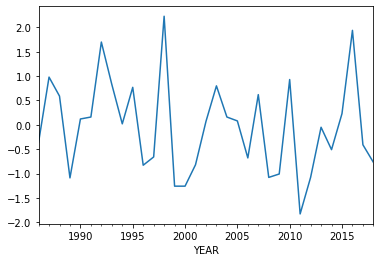

In [15]:
eom['DJ'].plot()

<AxesSubplot:xlabel='YEAR'>

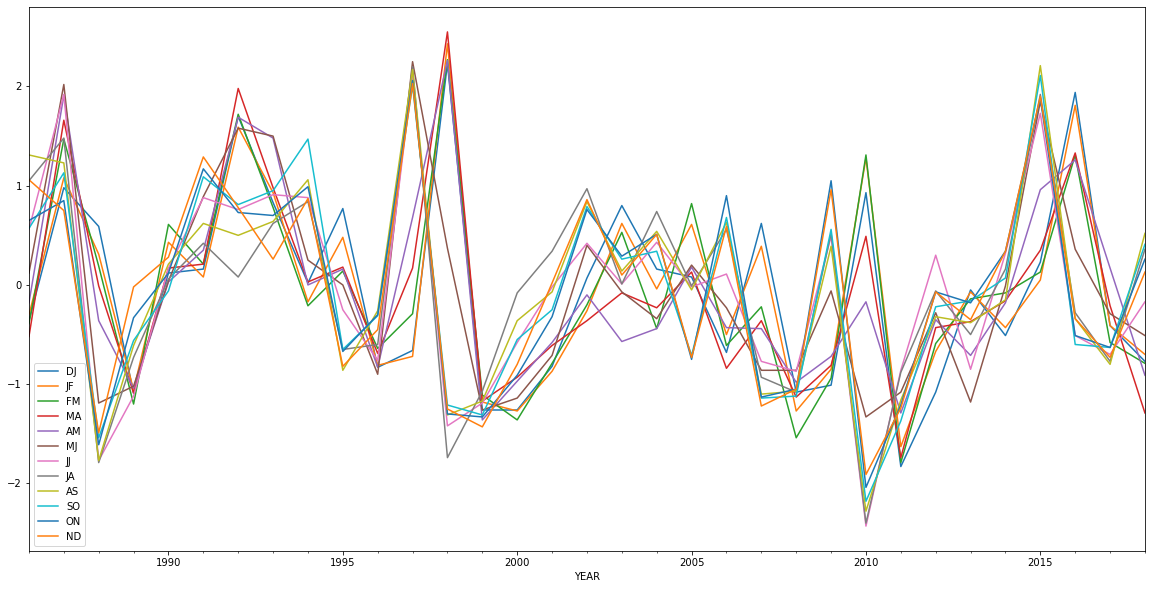

In [12]:
eom.plot(figsize=(20,10))

## suggestion for a nice paper:

### play with ENSO maximum and minimum and range (between a number of months), and explore correlations with trade in next 0,1,2 years of lag (values to explore could be changes in trade) ¶